In [1]:
import ztfimg
from ztfimg import catalog 
from ztfimg import science
import ztfin2p3
from ztfin2p3 import catalog 
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize
from scipy.stats import multivariate_normal
from scipy.stats import chi2

les fichiers sont répertoriés dans /sps/ztf/data

In [2]:
img = ztfimg.ScienceQuadrant.from_filename("/sps/ztf/data/sci/2020/0924/431759/ztf_20200924431759_000655_zr_c13_o_q3_sciimg.fits")

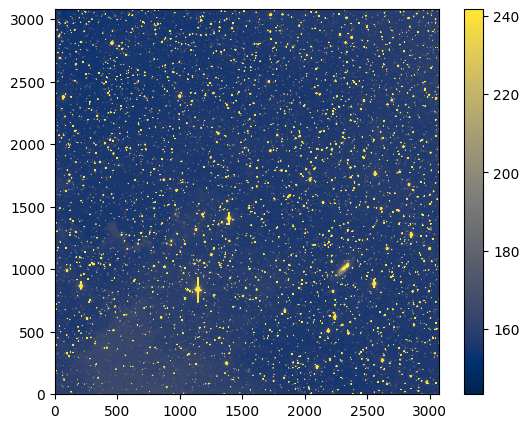

In [3]:
_= img.show()

In [4]:
ccd = img.get_ccd(1) #permet de prendre une CCD dans l'image

In [5]:
ccd.get_data() #converti en numpy array

dask.array<concatenate, shape=(6160, 6144), dtype=float32, chunksize=(3080, 3072), chunktype=numpy.ndarray>

In [6]:
ccd.filenames

['/sps/ztf/data/sci/2020/0924/431759/ztf_20200924431759_000655_zr_c13_o_q1_sciimg.fits',
 '/sps/ztf/data/sci/2020/0924/431759/ztf_20200924431759_000655_zr_c13_o_q2_sciimg.fits',
 '/sps/ztf/data/sci/2020/0924/431759/ztf_20200924431759_000655_zr_c13_o_q3_sciimg.fits',
 '/sps/ztf/data/sci/2020/0924/431759/ztf_20200924431759_000655_zr_c13_o_q4_sciimg.fits']

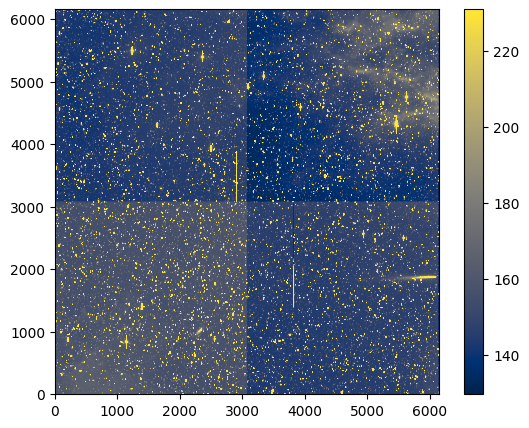

In [7]:
_ = ccd.show()

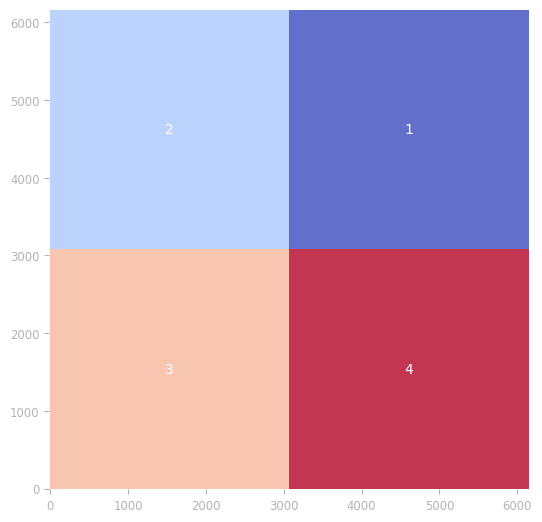

In [8]:
_ = ccd.show_footprint()

In [9]:
q1=img.get_ccd(1).get_quadrant(1) #selectionne le quadrant 1

In [10]:
# from ztfimg import base
# q1.get_header()

In [11]:
# img.get_header()

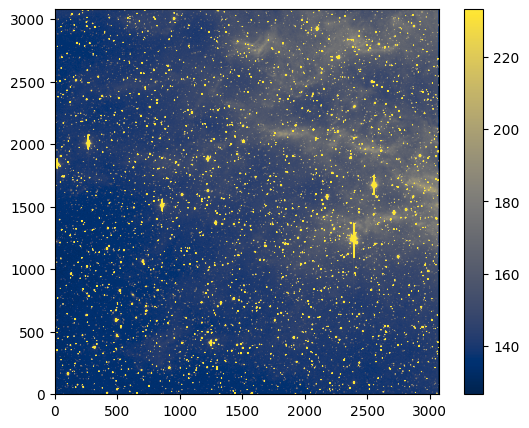

In [10]:
_= q1.show()

In [13]:
qimg1=q1.get_data() #converti en numpy array

In [14]:
qimg1

array([[128.14424 , 129.0606  , 133.1975  , ..., 271.24185 , 178.41664 ,
         53.72124 ],
       [147.11752 , 133.71019 , 133.6111  , ..., 146.13603 , 113.388596,
         26.419231],
       [139.19203 , 133.41039 , 136.65292 , ..., 138.22969 ,  95.631905,
         25.021835],
       ...,
       [135.7287  , 143.85782 , 143.7783  , ..., 149.64104 ,  96.56672 ,
         16.636278],
       [133.72552 , 146.9164  , 147.43076 , ..., 151.22047 , 100.14231 ,
         20.201305],
       [146.63974 , 150.67628 , 148.28304 , ..., 162.11705 , 126.70934 ,
         30.59527 ]], dtype='>f4')

In [15]:
qimg1_catalog=ztfin2p3.catalog.get_img_refcatalog(q1, which="gaia_dr2") # selectionne les données correspondantes au quadrant dans le catalogue gaia_dr2

In [16]:
qimg1_catalog

id  coord_ra  coord_dec  phot_g_mean_flux  \
129    219813196394074752  1.022063   0.631267      19364.662134   
397    219814055387539712  1.021917   0.631885      19170.957721   
588    219813990966500096  1.022137   0.631588      10834.239276   
672    219813990967555328  1.022259   0.631608      22999.223361   
885    219813986667958400  1.022207   0.631525     100498.350454   
...                   ...       ...        ...               ...   
46226  220221428742653312  1.032774   0.638324      22493.759828   
46227  220222425174937856  1.031937   0.638772      26718.511191   
46228  220221428742653056  1.032736   0.638255      19728.043596   
46229  220222150297029888  1.033060   0.639042      29696.189974   
46230  220222837491797120  1.032291   0.639088      19283.736902   

       phot_bp_mean_flux  phot_rp_mean_flux  phot_g_mean_fluxErr  \
129         11153.817950       44918.447986           145.772729   
397         15063.541265       37727.339113           147.958946   
588             0.000000           0.000000           278.348426   
672         16169.554068       43122.500844           124.869112   
885         78461.932516      138401.715711           195.276278   
...                  ...                ...                  ...   
46226       16424.839437       62035.232563           191.909249   
46227       26346.901613       55000.673126           127.799947   
46228       16724.007481       55019.487512           150.655958   
46229       25052.054667       67481.166354           157.877511   
46230       24116.178616       62433.943423           143.111386   

       phot_bp_mean_fluxErr  phot_rp_mean_fluxErr  coord_raErr  ...  \
129             1816.189023           2764.656741     0.015087  ...   
397             1788.185586           1791.514334     0.016626  ...   
588                     NaN                   NaN     0.118887  ...   
672             2040.371970           2554.235309     0.011630  ...   
885             2496.713320           2530.759746     0.003689  ...   
...                     ...                   ...          ...  ...   
46226           2305.520359           3564.341104     0.016817  ...   
46227           1775.946264           1942.964211     0.011641  ...   
46228           2545.991554           2643.068590     0.016434  ...   
46229           1931.663331           2026.738014     0.012025  ...   
46230           3423.229386           3439.147700     0.018034  ...   

              ra        dec  phot_g_mean_mag  phot_bp_mean_mag  \
129    58.559893  36.168937        20.682541         21.281507   
397    58.551509  36.204338        20.693456         20.955248   
588    58.564144  36.187312        21.313070               inf   
672    58.571138  36.188453        20.495783         20.878321   
885    58.568122  36.183714        18.894668         19.163418   
...          ...        ...              ...               ...   
46226  59.173581  36.573251        20.519910         20.861313   
46227  59.125635  36.598918        20.333035         20.348242   
46228  59.171392  36.569344        20.662356         20.841715   
46229  59.189991  36.614398        20.218314         20.402957   
46230  59.145911  36.617031        20.687088         20.444294   

       phot_rp_mean_mag  phot_g_mean_magErr  phot_bp_mean_magErr  \
129           19.769004            0.008173             0.176792   
397           19.958425            0.008380             0.128887   
588                 inf            0.027894                  NaN   
672           19.813306            0.005895             0.137005   
885           18.547212            0.002110             0.034549   
...                 ...                 ...                  ...   
46226         19.418470            0.009263             0.152403   
46227         19.549146            0.005193             0.073185   
46228         19.548774            0.008291             0.165288   
46229         19.327109            0.005772             0.08371

In [17]:
qimg1_catalog['isolated']=ztfimg.catalog.get_isolated(qimg1_catalog, seplimit=20) #on sélectionne les étoiles qui sont isolées de 15 arcsec et on ajoute une colonne de booléens

In [18]:
qimg1_catalog

id  coord_ra  coord_dec  phot_g_mean_flux  \
129    219813196394074752  1.022063   0.631267      19364.662134   
397    219814055387539712  1.021917   0.631885      19170.957721   
588    219813990966500096  1.022137   0.631588      10834.239276   
672    219813990967555328  1.022259   0.631608      22999.223361   
885    219813986667958400  1.022207   0.631525     100498.350454   
...                   ...       ...        ...               ...   
46226  220221428742653312  1.032774   0.638324      22493.759828   
46227  220222425174937856  1.031937   0.638772      26718.511191   
46228  220221428742653056  1.032736   0.638255      19728.043596   
46229  220222150297029888  1.033060   0.639042      29696.189974   
46230  220222837491797120  1.032291   0.639088      19283.736902   

       phot_bp_mean_flux  phot_rp_mean_flux  phot_g_mean_fluxErr  \
129         11153.817950       44918.447986           145.772729   
397         15063.541265       37727.339113           147.958946   
588             0.000000           0.000000           278.348426   
672         16169.554068       43122.500844           124.869112   
885         78461.932516      138401.715711           195.276278   
...                  ...                ...                  ...   
46226       16424.839437       62035.232563           191.909249   
46227       26346.901613       55000.673126           127.799947   
46228       16724.007481       55019.487512           150.655958   
46229       25052.054667       67481.166354           157.877511   
46230       24116.178616       62433.943423           143.111386   

       phot_bp_mean_fluxErr  phot_rp_mean_fluxErr  coord_raErr  ...  \
129             1816.189023           2764.656741     0.015087  ...   
397             1788.185586           1791.514334     0.016626  ...   
588                     NaN                   NaN     0.118887  ...   
672             2040.371970           2554.235309     0.011630  ...   
885             2496.713320           2530.759746     0.003689  ...   
...                     ...                   ...          ...  ...   
46226           2305.520359           3564.341104     0.016817  ...   
46227           1775.946264           1942.964211     0.011641  ...   
46228           2545.991554           2643.068590     0.016434  ...   
46229           1931.663331           2026.738014     0.012025  ...   
46230           3423.229386           3439.147700     0.018034  ...   

             dec  phot_g_mean_mag  phot_bp_mean_mag  phot_rp_mean_mag  \
129    36.168937        20.682541         21.281507         19.769004   
397    36.204338        20.693456         20.955248         19.958425   
588    36.187312        21.313070               inf               inf   
672    36.188453        20.495783         20.878321         19.813306   
885    36.183714        18.894668         19.163418         18.547212   
...          ...              ...               ...               ...   
46226  36.573251        20.519910         20.861313         19.418470   
46227  36.598918        20.333035         20.348242         19.549146   
46228  36.569344        20.662356         20.841715         19.548774   
46229  36.614398        20.218314         20.402957         19.327109   
46230  36.617031        20.687088         20.444294         19.411514   

       phot_g_mean_magErr  phot_bp_mean_magErr  phot_rp_mean_magErr  \
129              0.008173             0.176792             0.066825   
397              0.008380             0.128887             0.051557   
588              0.027894                  NaN                  NaN   
672              0.005895             0.137005             0.064310   
885              0.002110             0.034549             0.019853   
...                   ...                  ...                  ...   
46226            0.009263             0.152403             0.062383   
46227            0.005193             0.073185             0.038355   
46228            0.0

In [19]:
qimg1_catalog['isolated'].sort_values()

129      False
33126    False
33129    False
33131    False
33132    False
         ...  
19421     True
5232      True
5229      True
5239      True
43006     True
Name: isolated, Length: 15174, dtype: bool

In [20]:
qimg_catalog_isolated = qimg1_catalog.loc[qimg1_catalog['isolated']==True] # on ne garde que les étoiles isolées (dont le booléen est True)
qimg_catalog_isolated

id  coord_ra  coord_dec  phot_g_mean_flux  \
1257   219813162034231680  1.022524   0.631358      56484.125777   
3268   220191501412399872  1.023951   0.633582     114369.602057   
3270   220209020580007808  1.022170   0.637654      54395.369418   
3273   220212323411708416  1.024613   0.638554      20561.650227   
3292   220210914664501376  1.026161   0.637330     341175.954245   
...                   ...       ...        ...               ...   
46086  220221768044233728  1.033274   0.638688      69138.758501   
46106  220221458806550144  1.031952   0.637783      61719.673420   
46187  220221183928621824  1.032312   0.637443      58686.360098   
46199  220221360023846144  1.032940   0.638332      11376.166835   
46215  220222489598755328  1.031657   0.638984     110993.739558   

       phot_bp_mean_flux  phot_rp_mean_flux  phot_g_mean_fluxErr  \
1257        42256.581455       93808.545649           148.046425   
3268        32531.790031      277776.695117           211.840454   
3270        40404.651483       84842.437576           164.713214   
3273         6592.091984       38558.428039           204.891647   
3292       249688.370617      486394.403196           333.605022   
...                  ...                ...                  ...   
46086       35662.047304      159827.005262           176.241034   
46106       51404.713078       96678.727023           179.941604   
46187       47686.633838       94344.255990           174.066169   
46199           0.000000           0.000000           280.984380   
46215       89125.403212      167413.557224           200.569033   

       phot_bp_mean_fluxErr  phot_rp_mean_fluxErr  coord_raErr  ...  \
1257            3849.556127           2582.799562     0.005471  ...   
3268            1674.693222           2859.728780     0.003461  ...   
3270            2473.881451           2778.866326     0.006004  ...   
3273            1383.593394           4750.605005     0.026625  ...   
3292            4307.633356           1871.193552     0.002145  ...   
...                     ...                   ...          ...  ...   
46086           2063.808610           3532.829198     0.005335  ...   
46106           1971.466410           2699.492544     0.005133  ...   
46187           1770.311333           2686.906011     0.005790  ...   
46199                   NaN                   NaN     0.109795  ...   
46215           2458.777983           2783.604547     0.004125  ...   

             dec  phot_g_mean_mag  phot_bp_mean_mag  phot_rp_mean_mag  \
1257   36.174151        19.520250         19.835330         18.969460   
3268   36.301600        18.754289         20.119296         17.790826   
3270   36.534878        19.561161         19.883987         19.078533   
3273   36.586471        20.617421         21.852507         19.934767   
3292   36.516333        17.567620         17.906570         17.182594   
...          ...              ...               ...               ...   
46086  36.594154        19.300762         20.019550         18.390940   
46106  36.542246        19.424007         19.622558         18.936738   
46187  36.522809        19.478723         19.704074         18.963277   
46199  36.573721        21.260076               inf               inf   
46215  36.611102        18.786819         19.025062         18.340589   

       phot_g_mean_magErr  phot_bp_mean_magErr  phot_rp_mean_magErr  \
1257             0.002846             0.098910             0.029893   
3268             0.002011             0.055892             0.011178   
3270             0.003288             0.066477             0.035561   
3273             0.010819             0.227882             0.133769   
3292             0.001062             0.018731             0.004177   
...                   ...                  ...                  ...   
46086            0.002768             0.062833             0.023999   
46106            0.003165             0.041640             0.030316   
46187            0.0

In [21]:
qimg_catalog_isolated.columns

Index(['id', 'coord_ra', 'coord_dec', 'phot_g_mean_flux', 'phot_bp_mean_flux',
       'phot_rp_mean_flux', 'phot_g_mean_fluxErr', 'phot_bp_mean_fluxErr',
       'phot_rp_mean_fluxErr', 'coord_raErr', 'coord_decErr', 'epoch', 'pm_ra',
       'pm_dec', 'pm_raErr', 'pm_decErr', 'parallax', 'parallaxErr',
       'astrometric_excess_noise', 'ra', 'dec', 'phot_g_mean_mag',
       'phot_bp_mean_mag', 'phot_rp_mean_mag', 'phot_g_mean_magErr',
       'phot_bp_mean_magErr', 'phot_rp_mean_magErr', 'x', 'y', 'isolated'],
      dtype='object')

Text(0, 0.5, 'number')

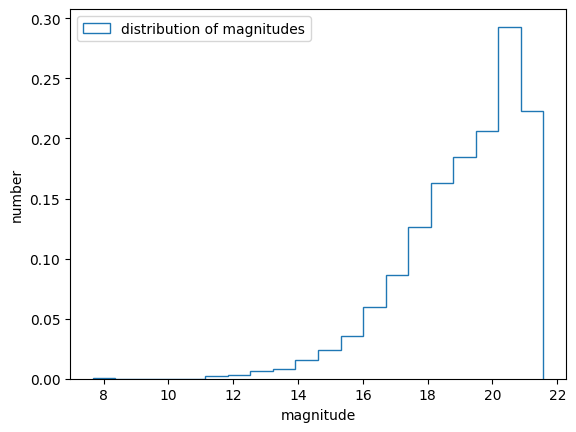

In [22]:
plt.hist(qimg_catalog_isolated['phot_g_mean_mag'], density=1, bins=20, histtype='step', label='distribution of magnitudes')
plt.legend()
plt.xlabel('magnitude')
plt.ylabel('number')

In [23]:
mag_inf=qimg_catalog_isolated['phot_g_mean_mag']>14 #selectionne les magnitudes supérieures à 14
mag_sup=qimg_catalog_isolated['phot_g_mean_mag']<18 #selectionne les magnitudes inférieures à 18
qimg_catalog_isolated_mag=qimg_catalog_isolated.loc[mag_inf & mag_sup]
qimg_catalog_isolated_mag

id  coord_ra  coord_dec  phot_g_mean_flux  \
3292   220210914664501376  1.026161   0.637330      3.411760e+05   
3314   220210949024241920  1.025702   0.637414      2.846405e+05   
3343   220214655577103232  1.022990   0.637796      6.637216e+05   
3494   220216407923781760  1.023645   0.639737      3.310731e+05   
3524   220213216767321088  1.026577   0.638661      7.455134e+05   
...                   ...       ...        ...               ...   
45776  220167793192842368  1.033080   0.634488      4.161678e+06   
45799  220175077457571712  1.036926   0.636100      1.675470e+06   
45891  220225586272711168  1.030969   0.639192      6.834436e+05   
45903  220222596975471872  1.031456   0.639021      6.083751e+05   
46083  220222047219645952  1.032855   0.639023      4.561568e+05   

       phot_bp_mean_flux  phot_rp_mean_flux  phot_g_mean_fluxErr  \
3292        2.496884e+05       4.863944e+05           333.605022   
3314        1.552300e+05       4.988820e+05           263.706599   
3343        4.199027e+05       1.086072e+06           553.114736   
3494        2.083656e+05       5.224247e+05           297.967950   
3524        4.821637e+05       1.142259e+06           524.353589   
...                  ...                ...                  ...   
45776       3.407272e+06       5.055197e+06          1242.641362   
45799       1.183528e+06       2.416099e+06           681.649828   
45891       4.806962e+05       9.924018e+05           407.310306   
45903       5.244016e+05       7.197826e+05           425.536839   
46083       3.466966e+05       6.176064e+05           319.226787   

       phot_bp_mean_fluxErr  phot_rp_mean_fluxErr  coord_raErr  ...  \
3292            4307.633356           1871.193552     0.002145  ...   
3314            2006.851979           3996.709121     0.001880  ...   
3343            1744.992099           2613.982357     0.001542  ...   
3494            1487.596690           3983.500840     0.001617  ...   
3524            3058.071864           5102.794374     0.001253  ...   
...                     ...                   ...          ...  ...   
45776           5762.443728           7624.821103     0.000454  ...   
45799           2936.846731           3462.371170     0.000738  ...   
45891           1946.126256           4175.423717     0.001170  ...   
45903           2348.414058           4584.703300     0.001287  ...   
46083           1693.682760           1940.580623     0.001605  ...   

             dec  phot_g_mean_mag  phot_bp_mean_mag  phot_rp_mean_mag  \
3292   36.516333        17.567620         17.906570         17.182594   
3314   36.521120        17.764324         18.422627         17.155071   
3343   36.543040        16.845101         17.342194         16.310420   
3494   36.654212        17.600256         18.103001         17.105006   
3524   36.592557        16.718927         17.192079         16.255654   
...          ...              ...               ...               ...   
45776  36.353509        14.851894         15.069049         14.640720   
45799  36.445829        15.839724         16.217119         15.442279   
45891  36.622983        16.813309         17.195389         16.408347   
45903  36.613195        16.939637         17.100906         16.757062   
46083  36.613349        17.252280         17.550192         16.923286   

       phot_g_mean_magErr  phot_bp_mean_magErr  phot_rp_mean_magErr  \
3292             0.001062             0.018731             0.004177   
3314             0.001006             0.014037             0.008698   
3343             0.000905             0.004512             0.002613   
3494             0.000977             0.007751             0.008279   
3524             0.000764             0.006886             0.004850   
...                   ...                  ...                  ...   
45776            0.000324             0.001836             0.001638   
45799            0.000442             0.002694             0.001556   
45891            0.0

Text(0, 0.5, 'number')

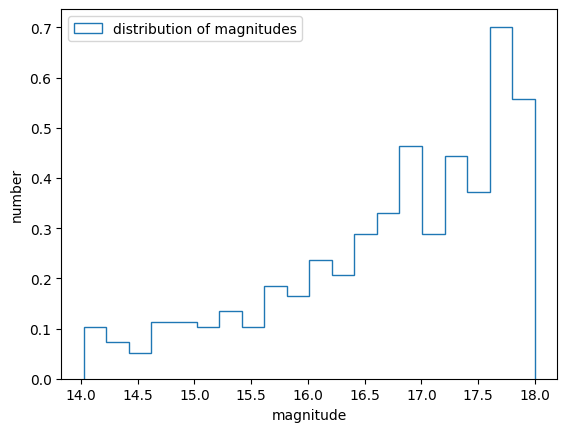

In [24]:
plt.hist(qimg_catalog_isolated_mag['phot_g_mean_mag'], density=1, bins=20, histtype='step', label='distribution of magnitudes')
plt.legend()
plt.xlabel('magnitude')
plt.ylabel('number')

In [25]:
qimg_catalog_isolated_mag=qimg_catalog_isolated_mag.drop('isolated', axis=1)
qimg_catalog_isolated_mag

id  coord_ra  coord_dec  phot_g_mean_flux  \
3292   220210914664501376  1.026161   0.637330      3.411760e+05   
3314   220210949024241920  1.025702   0.637414      2.846405e+05   
3343   220214655577103232  1.022990   0.637796      6.637216e+05   
3494   220216407923781760  1.023645   0.639737      3.310731e+05   
3524   220213216767321088  1.026577   0.638661      7.455134e+05   
...                   ...       ...        ...               ...   
45776  220167793192842368  1.033080   0.634488      4.161678e+06   
45799  220175077457571712  1.036926   0.636100      1.675470e+06   
45891  220225586272711168  1.030969   0.639192      6.834436e+05   
45903  220222596975471872  1.031456   0.639021      6.083751e+05   
46083  220222047219645952  1.032855   0.639023      4.561568e+05   

       phot_bp_mean_flux  phot_rp_mean_flux  phot_g_mean_fluxErr  \
3292        2.496884e+05       4.863944e+05           333.605022   
3314        1.552300e+05       4.988820e+05           263.706599   
3343        4.199027e+05       1.086072e+06           553.114736   
3494        2.083656e+05       5.224247e+05           297.967950   
3524        4.821637e+05       1.142259e+06           524.353589   
...                  ...                ...                  ...   
45776       3.407272e+06       5.055197e+06          1242.641362   
45799       1.183528e+06       2.416099e+06           681.649828   
45891       4.806962e+05       9.924018e+05           407.310306   
45903       5.244016e+05       7.197826e+05           425.536839   
46083       3.466966e+05       6.176064e+05           319.226787   

       phot_bp_mean_fluxErr  phot_rp_mean_fluxErr  coord_raErr  ...  \
3292            4307.633356           1871.193552     0.002145  ...   
3314            2006.851979           3996.709121     0.001880  ...   
3343            1744.992099           2613.982357     0.001542  ...   
3494            1487.596690           3983.500840     0.001617  ...   
3524            3058.071864           5102.794374     0.001253  ...   
...                     ...                   ...          ...  ...   
45776           5762.443728           7624.821103     0.000454  ...   
45799           2936.846731           3462.371170     0.000738  ...   
45891           1946.126256           4175.423717     0.001170  ...   
45903           2348.414058           4584.703300     0.001287  ...   
46083           1693.682760           1940.580623     0.001605  ...   

              ra        dec  phot_g_mean_mag  phot_bp_mean_mag  \
3292   58.794687  36.516333        17.567620         17.906570   
3314   58.768417  36.521120        17.764324         18.422627   
3343   58.612995  36.543040        16.845101         17.342194   
3494   58.650511  36.654212        17.600256         18.103001   
3524   58.818547  36.592557        16.718927         17.192079   
...          ...        ...              ...               ...   
45776  59.191138  36.353509        14.851894         15.069049   
45799  59.411462  36.445829        15.839724         16.217119   
45891  59.070190  36.622983        16.813309         17.195389   
45903  59.098059  36.613195        16.939637         17.100906   
46083  59.178221  36.613349        17.252280         17.550192   

       phot_rp_mean_mag  phot_g_mean_magErr  phot_bp_mean_magErr  \
3292          17.182594            0.001062             0.018731   
3314          17.155071            0.001006             0.014037   
3343          16.310420            0.000905             0.004512   
3494          17.105006            0.000977             0.007751   
3524          16.255654            0.000764             0.006886   
...                 ...                 ...                  ...   
45776         14.640720            0.000324             0.001836   
45799         15.442279            0.000442             0.002694   
45891         16.408347            0.000647             0.004396   
45903         16.757062            0.000759             0.00486

In [26]:
print(q1.shape[0], q1.shape[1])

3080 3072


In [27]:
mag_bord_left=qimg_catalog_isolated_mag['x']>15
mag_bord_right=qimg_catalog_isolated_mag['x']<(q1.shape[0]-15)
mag_bord_top=qimg_catalog_isolated_mag['y']>15
mag_bord_bottom=qimg_catalog_isolated_mag['y']<(q1.shape[1]-15)

mag_bord_combined = np.logical_and.reduce((mag_bord_left, mag_bord_right, mag_bord_top, mag_bord_bottom))
qimg_catalog_isolated_mag_bord = qimg_catalog_isolated_mag[mag_bord_combined]
qimg_catalog_isolated_mag_bord

id  coord_ra  coord_dec  phot_g_mean_flux  \
3292   220210914664501376  1.026161   0.637330      3.411760e+05   
3314   220210949024241920  1.025702   0.637414      2.846405e+05   
3343   220214655577103232  1.022990   0.637796      6.637216e+05   
3494   220216407923781760  1.023645   0.639737      3.310731e+05   
3524   220213216767321088  1.026577   0.638661      7.455134e+05   
...                   ...       ...        ...               ...   
45776  220167793192842368  1.033080   0.634488      4.161678e+06   
45799  220175077457571712  1.036926   0.636100      1.675470e+06   
45891  220225586272711168  1.030969   0.639192      6.834436e+05   
45903  220222596975471872  1.031456   0.639021      6.083751e+05   
46083  220222047219645952  1.032855   0.639023      4.561568e+05   

       phot_bp_mean_flux  phot_rp_mean_flux  phot_g_mean_fluxErr  \
3292        2.496884e+05       4.863944e+05           333.605022   
3314        1.552300e+05       4.988820e+05           263.706599   
3343        4.199027e+05       1.086072e+06           553.114736   
3494        2.083656e+05       5.224247e+05           297.967950   
3524        4.821637e+05       1.142259e+06           524.353589   
...                  ...                ...                  ...   
45776       3.407272e+06       5.055197e+06          1242.641362   
45799       1.183528e+06       2.416099e+06           681.649828   
45891       4.806962e+05       9.924018e+05           407.310306   
45903       5.244016e+05       7.197826e+05           425.536839   
46083       3.466966e+05       6.176064e+05           319.226787   

       phot_bp_mean_fluxErr  phot_rp_mean_fluxErr  coord_raErr  ...  \
3292            4307.633356           1871.193552     0.002145  ...   
3314            2006.851979           3996.709121     0.001880  ...   
3343            1744.992099           2613.982357     0.001542  ...   
3494            1487.596690           3983.500840     0.001617  ...   
3524            3058.071864           5102.794374     0.001253  ...   
...                     ...                   ...          ...  ...   
45776           5762.443728           7624.821103     0.000454  ...   
45799           2936.846731           3462.371170     0.000738  ...   
45891           1946.126256           4175.423717     0.001170  ...   
45903           2348.414058           4584.703300     0.001287  ...   
46083           1693.682760           1940.580623     0.001605  ...   

              ra        dec  phot_g_mean_mag  phot_bp_mean_mag  \
3292   58.794687  36.516333        17.567620         17.906570   
3314   58.768417  36.521120        17.764324         18.422627   
3343   58.612995  36.543040        16.845101         17.342194   
3494   58.650511  36.654212        17.600256         18.103001   
3524   58.818547  36.592557        16.718927         17.192079   
...          ...        ...              ...               ...   
45776  59.191138  36.353509        14.851894         15.069049   
45799  59.411462  36.445829        15.839724         16.217119   
45891  59.070190  36.622983        16.813309         17.195389   
45903  59.098059  36.613195        16.939637         17.100906   
46083  59.178221  36.613349        17.252280         17.550192   

       phot_rp_mean_mag  phot_g_mean_magErr  phot_bp_mean_magErr  \
3292          17.182594            0.001062             0.018731   
3314          17.155071            0.001006             0.014037   
3343          16.310420            0.000905             0.004512   
3494          17.105006            0.000977             0.007751   
3524          16.255654            0.000764             0.006886   
...                 ...                 ...                  ...   
45776         14.640720            0.000324             0.001836   
45799         15.442279            0.000442             0.002694   
45891         16.408347            0.000647             0.004396   
45903         16.757062            0.000759             0.00486

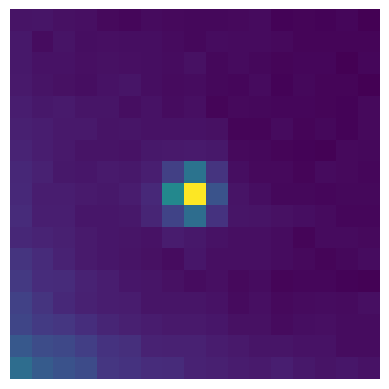

In [28]:
## Test plot une image ###

df = qimg_catalog_isolated_mag_bord.loc[30969]
x= df['x']
y= df['y']
x_central= int(round(x))
y_central= int(round(y))

size = 17
left = x_central - (size // 2)
top = y_central - (size // 2)
right = left + size
bottom = top + size

region = qimg1[top:bottom, left:right]

plt.imshow(region)
plt.axis('off')  # Masquer les axes
plt.show()


In [29]:
def fitgaussian2D(pos, sig_x, sig_y):
    """Returns a gaussian function with the given parameters multiplied by amplitude"""
    mu = [0,0]
    cov = [[sig_x**2, 0], [0, sig_y**2]]
    rv = multivariate_normal(mu, cov)
    return rv.pdf(pos.T)

In [30]:
%%time

### calcul du fit sans plot sur les 100 premières étoiles ###

total_images = 10
end = qimg_catalog_isolated_mag_bord.head(total_images)

size = 17

for i, (index, row) in enumerate(end.iterrows()):
    x_central = int(round(row['x']))
    y_central = int(round(row['y']))
    left = x_central - (size // 2)
    top = y_central - (size // 2)
    right = left + size
    bottom = top + size
    X = np.linspace(left, right, size) - x_central
    Y = np.linspace(top, bottom, size) - y_central
    X, Y = np.meshgrid(X, Y)
    pos = np.vstack((X.ravel(), Y.ravel()))
    region = qimg1[top:bottom, left:right]
    
    popt, pcov = optimize.curve_fit(fitgaussian2D, pos, region.ravel(), p0=[1, 1], bounds=(1e-15, [1, 1])) # Provide 2 initial values in p0: sig_x, sig_y
    fit = fitgaussian2D(pos, *popt)
    fit = fit.reshape([size,size])
    
    sig_x_list = []
    sig_x_list.append(popt[0]) 
    sig_y_list = []
    sig_y_list.append(popt[1])
    
sig_x_mean = np.mean(sig_x_list)
print("Moyenne de sigma_x :", sig_x_mean)
sig_y_mean = np.mean(sig_y_list)
print("Moyenne de sigma_y :", sig_y_mean)
cov = ([sig_x_mean**2, 0], [0, sig_y_mean**2])
print("Covariance moyenne:", cov)

Moyenne de sigma_x : 0.5477573212886628
Moyenne de sigma_y : 0.5419136681658759
Covariance moyenne: ([0.3000380830253314, 0], [0, 0.2936704237449951])
CPU times: user 206 ms, sys: 3.7 ms, total: 210 ms
Wall time: 208 ms


Moyenne de sigma_x : 0.5477573212886628
Moyenne de sigma_y : 0.5419136681658759
Covariance moyenne: ([0.3000380830253314, 0], [0, 0.2936704237449951])


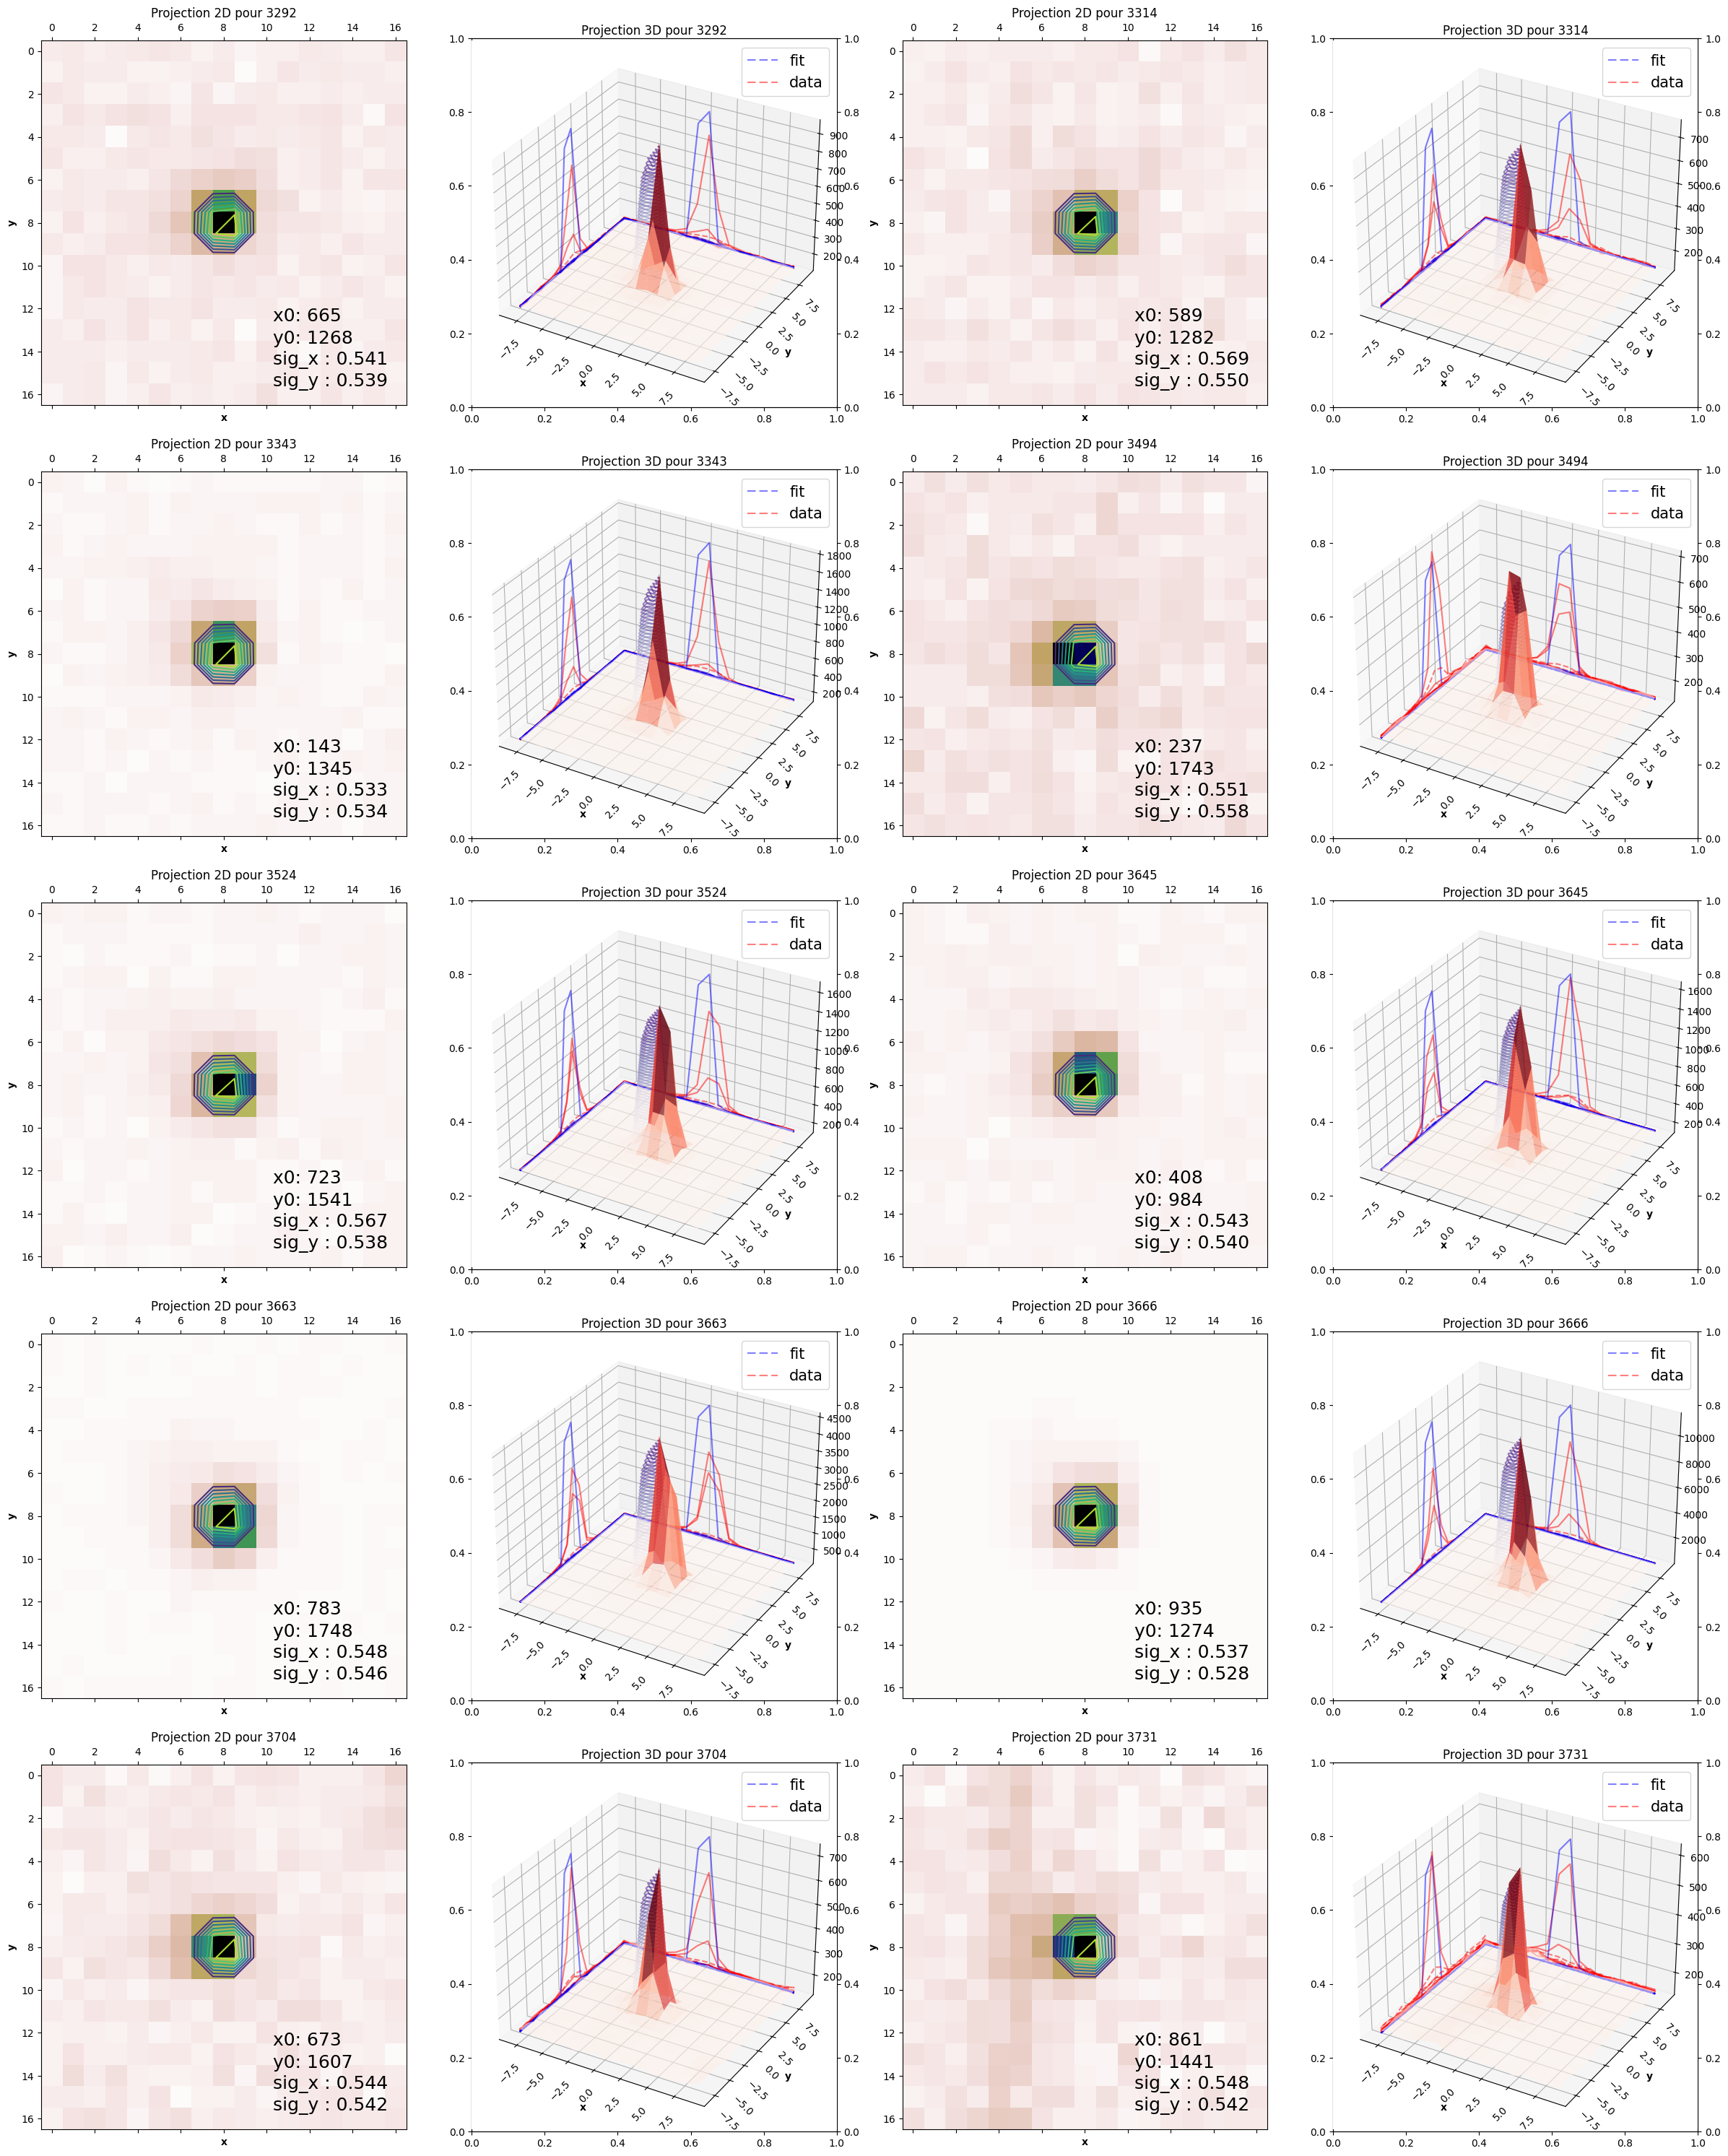

CPU times: user 6.23 s, sys: 154 ms, total: 6.38 s
Wall time: 6.39 s


In [31]:
%%time

### calcul du fit avec plot sur les 100 premières étoiles ###

total_images = 10
num_cols = 4  # 2 colonnes pour les projections 2D et 3D
num_rows = total_images // 2 # 2 images par ligne

fig_height = num_rows * 6
fig_width = num_cols * 6
fig, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))  
end = qimg_catalog_isolated_mag_bord.head(total_images)

size = 17

background = science.ComplexImage.get_background(q1)
background = np.resize(background, [size,size])

for i, (index, row) in enumerate(end.iterrows()):
    x_central = int(round(row['x']))
    y_central = int(round(row['y']))
    left = x_central - (size // 2)
    top = y_central - (size // 2)
    right = left + size
    bottom = top + size
    X = np.linspace(left, right, size) - x_central
    Y = np.linspace(top, bottom, size) - y_central
    X, Y = np.meshgrid(X, Y)
    pos = np.vstack((X.ravel(), Y.ravel()))
    region = qimg1[top:bottom, left:right]
    
    # Déterminer l'indice de ligne
    row_index = i // 2
    # Déterminer l'indice de colonne
    col_index = (i % 2) * 2

    # Graphique 2D (colonnes 1 et 3) + fit
    ax = axs[row_index, col_index]  # Pour les projections 2D
    cax = ax.matshow(region, cmap=plt.cm.gist_earth_r)  # Affichage de l'image sur l'axe
    popt, pcov = optimize.curve_fit(fitgaussian2D, pos, region.ravel(), p0=[1, 1], bounds=(1e-15, [1, 1])) # Provide 2 initial values in p0: sig_x, sig_y
    fit = fitgaussian2D(pos, *popt)
    fit = fit.reshape([size,size])
    ax.contour(fit, cmap='viridis', origin="lower") # Affichage du contour du fit
    titre2D = f"Projection 2D pour {index}"
    ax.set_title(titre2D)
    ax.text(0.635, 0.22, f"x0: {x_central}", fontsize=18, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    ax.text(0.635, 0.16, f"y0: {y_central}", fontsize=18, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    ax.text(0.95, 0.1, f"sig_x : {popt[0]:.3f}", fontsize=18, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    ax.text(0.95, 0.04, f"sig_y : {popt[1]:.3f}", fontsize=18, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    ax.set_xlabel('x', fontdict=dict(weight='bold'))
    ax.set_ylabel('y', fontdict=dict(weight='bold'))

    region_max = np.max(region)
    diff_mean = np.mean(region - fit)
    fit_max_coords = np.unravel_index(np.argmax(fit), fit.shape)
    fit_max_x, fit_max_y = fit_max_coords[1], fit_max_coords[0]
    fit_max_center = fit[fit_max_y, fit_max_x]
    scale = (region_max - diff_mean) / fit_max_center
    fit_norm = scale * fit + background

    # Graphique 3D (colonnes 2 et 4)
    ax3d = axs[row_index, col_index + 1].twinx()
    ax3d = axs[row_index, col_index + 1].figure.add_subplot(axs[row_index, col_index + 1].get_subplotspec(), projection='3d')
    ax3d.plot_surface(X, Y, region, cmap='Reds', alpha=0.6)
    titre3D = f"Projection 3D pour {index}"
    ax3d.set_title(titre3D)
    ax3d.contour3D(X, Y, fit_norm, 50, cmap='Purples', alpha=0.6)
    ax3d.set_xlabel('x', fontdict=dict(weight='bold'))
    ax3d.set_ylabel('y', fontdict=dict(weight='bold'))
    # Ajustement des étiquettes des axes
    ax3d.xaxis.set_tick_params(rotation=45)  # Rotation des étiquettes de l'axe X
    ax3d.yaxis.set_tick_params(rotation=-45)  # Rotation des étiquettes de l'axe Y
    # Affichage de la projection xz sur le côté
    c1 = ax3d.contour(X, Y, fit_norm, 10, zdir='y', offset=np.max(Y), colors='blue', alpha=0.5)
    c2 = ax3d.contour(X, Y, region, 10, zdir='y', offset=np.max(Y), colors='red', alpha=0.5)
    # Affichage de la projection zy sur le côté
    ax3d.contour(X, Y, fit_norm, 10, zdir='x', offset=np.min(X), colors='blue', alpha=0.5)
    ax3d.contour(X, Y, region, 10, zdir='x', offset=np.min(X), colors='red', alpha=0.5)    
    h1,_ = c1.legend_elements()
    h2,_ = c2.legend_elements()
    ax3d.legend([h1[0], h2[0]], ['fit', 'data'], fontsize = '15')
    
    sig_x_list = []
    sig_x_list.append(popt[0]) 
    sig_y_list = []
    sig_y_list.append(popt[1])
    
sig_x_mean = np.mean(sig_x_list)
print("Moyenne de sigma_x :", sig_x_mean)
sig_y_mean = np.mean(sig_y_list)
print("Moyenne de sigma_y :", sig_y_mean)
cov = ([sig_x_mean**2, 0], [0, sig_y_mean**2])
print("Covariance moyenne:", cov)

plt.tight_layout()  # Ajustement automatique de la disposition
plt.show()  # Affichage de la mosaïque

In [34]:
%%time

### Application du fit sur 100 prochaines étoiles sans plot ###

total_images = 10
data = qimg_catalog_isolated_mag_bord.iloc[total_images : total_images+100] 

size = 17

chi_sqr = 0.0  # Initialisation du X²
num_pixels = 0

background = science.ComplexImage.get_background(q1) #calcul du bruit de fond 
background = np.resize(background, [size,size])

for i, (index, row) in enumerate(data.iterrows()):
    x_central = int(round(row['x']))
    y_central = int(round(row['y']))
    left = x_central - (size // 2)
    top = y_central - (size // 2)
    right = left + size
    bottom = top + size
    X = np.linspace(left, right, size) - x_central
    Y = np.linspace(top, bottom, size) - y_central
    X, Y = np.meshgrid(X, Y)
    pos = np.vstack((X.ravel(), Y.ravel()))
    region = qimg1[top:bottom, left:right]
    
    # fit avec covariance fixée
    fit = fitgaussian2D(pos, sig_x_mean, sig_y_mean)
    fit = fit.reshape([size,size])
    
    region_max = np.max(region)
    diff_mean = np.mean(region - fit)
    fit_max_coords = np.unravel_index(np.argmax(fit), fit.shape)
    fit_max_x, fit_max_y = fit_max_coords[1], fit_max_coords[0]
    fit_max_center = fit[fit_max_y, fit_max_x]
    scale = (region_max - diff_mean) / fit_max_center
    fit_norm = scale * fit + background

    #Calcul du X²
    residuals = (region - fit_norm) / background # Calcul de la différence entre données observées et ajustées
    chi_sqr += np.sum(residuals**2) # Ajout de chaque terme au chi-square
    num_pixels += np.prod(residuals.shape)  # Mise à jour du nombre total de pixels

    chi_sqr /= num_pixels # Normalisation du chi-square
    degrees_of_freedom = num_pixels - 2  # Calcul du degré de liberté: 2 paramètres libres dans le fit
    p_value = 1 - chi2.cdf(chi_sqr, degrees_of_freedom) # Calcul de la p-value associée au chi-square

    chi2_list = []
    chi2_list.append(chi_sqr)
    df_list = []
    df_list.append(degrees_of_freedom)
    p_value_list = []
    p_value_list.append(p_value)
    
chi_sqr_mean = np.mean(chi2_list)
degrees_of_freedom_mean = np.mean(df_list)
p_value_mean = np.mean(p_value_list)

# print("Moyenne de sigma_x :", sig_x_mean)
# print("Moyenne de sigma_y :", sig_y_mean)
# print("Covariance moyenne:", cov)
print("Moyenne du Chi2:", chi_sqr_mean)
print("Moyenne du degré de liberté:", degrees_of_freedom_mean)
print("Moyenne de la P-value:", p_value_mean)

Moyenne du Chi2: 0.0027303958887103987
Moyenne du degré de liberté: 28898.0
Moyenne de la P-value: 1.0
CPU times: user 141 ms, sys: 30 ms, total: 171 ms
Wall time: 168 ms


IndexError: index 5 is out of bounds for axis 0 with size 5

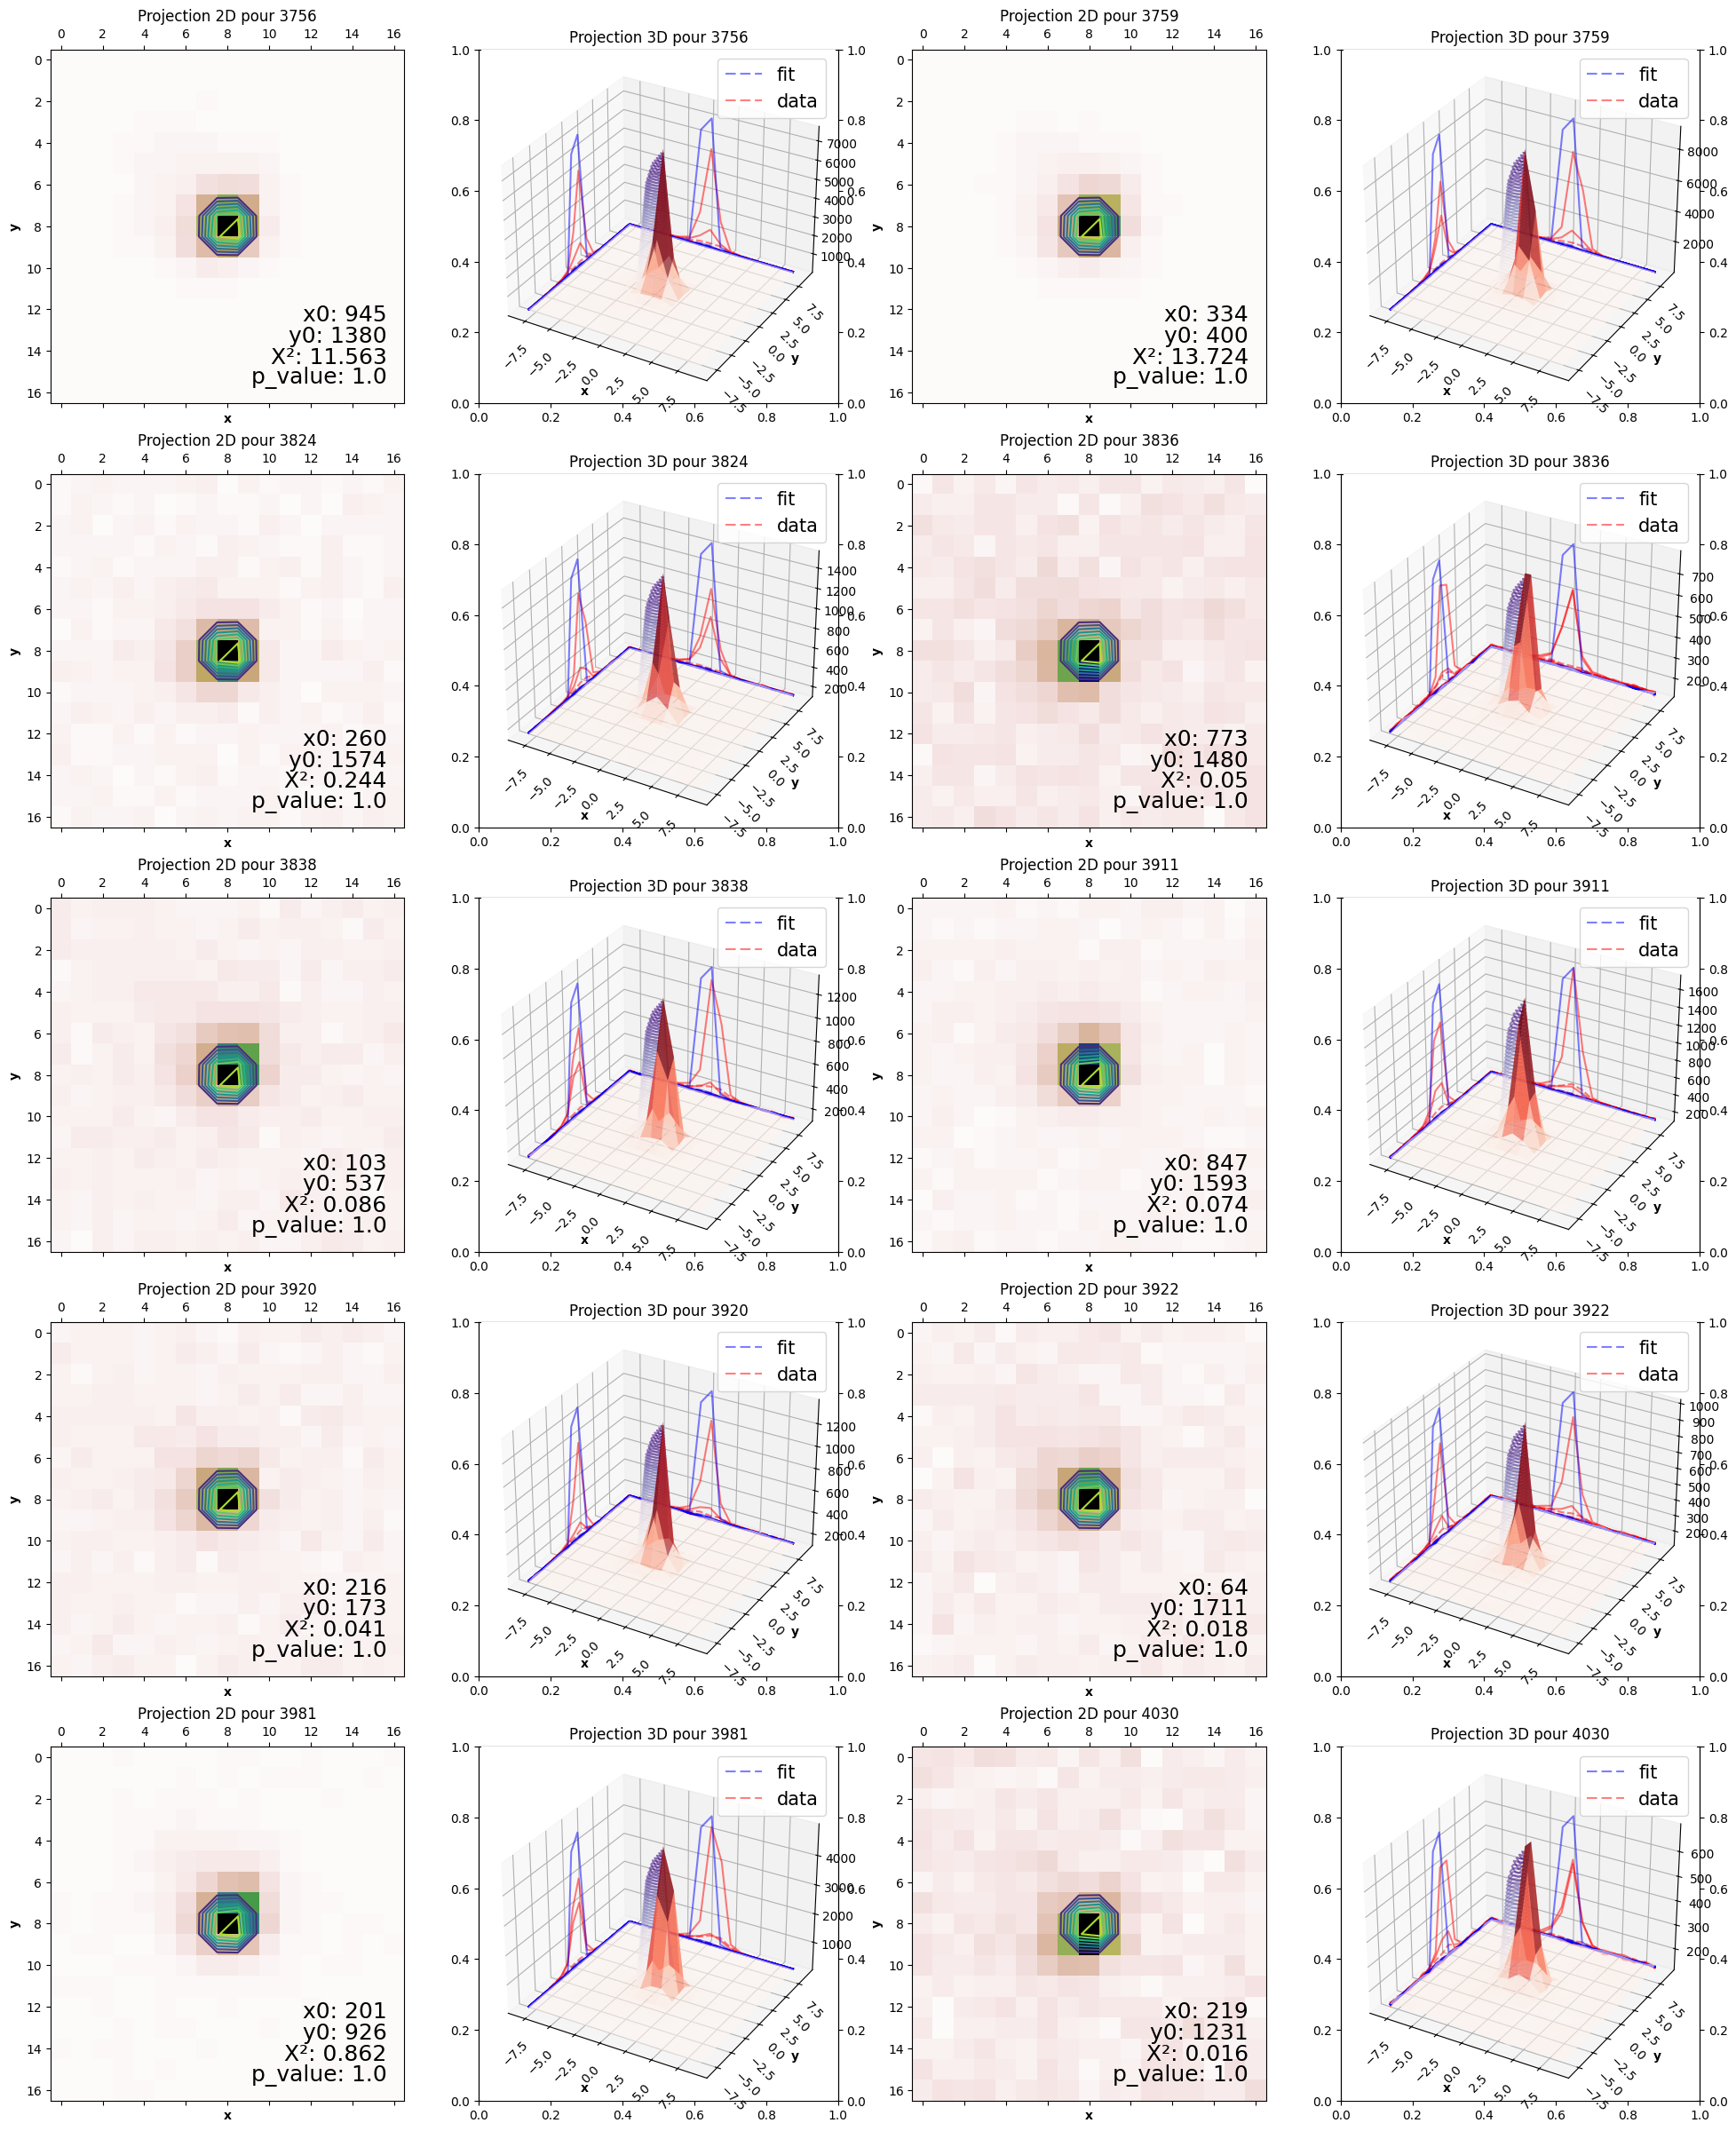

In [35]:
%%time

### Application du fit sur les 100 prochaines étoiles avec plot ###

total_images = 10
num_cols = 4  # 2 colonnes pour les projections 2D et 3D
num_rows = total_images // 2 # 2 images par ligne 
data = qimg_catalog_isolated_mag_bord.iloc[total_images : total_images+100] 

fig_height = num_rows * 6
fig_width = num_cols * 6
fig, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height)) 

size = 17

chi_sqr = 0.0  # Initialisation du X²
num_pixels = 0

background = science.ComplexImage.get_background(q1)
background = np.resize(background, [size,size])

for i, (index, row) in enumerate(data.iterrows()):
    x_central = int(round(row['x']))
    y_central = int(round(row['y']))
    left = x_central - (size // 2)
    top = y_central - (size // 2)
    right = left + size
    bottom = top + size
    X = np.linspace(left, right, size) - x_central
    Y = np.linspace(top, bottom, size) - y_central
    X, Y = np.meshgrid(X, Y)
    pos = np.vstack((X.ravel(), Y.ravel()))
    region = qimg1[top:bottom, left:right]
    
    # Déterminer l'indice de ligne
    row_index = i // 2
    # Déterminer l'indice de colonne
    col_index = (i % 2) * 2

    # Graphique 2D (colonnes 1 et 3)
    ax = axs[row_index, col_index]  # Pour les projections 2D
    cax = ax.matshow(region, cmap=plt.cm.gist_earth_r)  # Affichage de l'image sur l'axe
    fit = fitgaussian2D(pos, sig_x_mean, sig_y_mean)
    fit = fit.reshape([size,size])
    ax.contour(fit, cmap='viridis', origin="lower") # Affichage du contour du fit
    titre2D = f"Projection 2D pour {index}"
    ax.set_title(titre2D)
    ax.text(0.95, 0.22, f"x0: {x_central}", fontsize=18, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    ax.text(0.95, 0.16, f"y0: {y_central}", fontsize=18, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    ax.set_xlabel('x', fontdict=dict(weight='bold'))
    ax.set_ylabel('y', fontdict=dict(weight='bold'))
    
    region_max = np.max(region)
    diff_mean = np.mean(region - fit)
    fit_max_coords = np.unravel_index(np.argmax(fit), fit.shape)
    fit_max_x, fit_max_y = fit_max_coords[1], fit_max_coords[0]
    fit_max_center = fit[fit_max_y, fit_max_x]
    scale = (region_max - diff_mean) / fit_max_center
    fit_norm = scale * fit + background
    
    # Graphique 3D (colonnes 2 et 4)
    ax3d = axs[row_index, col_index + 1].twinx()
    ax3d = axs[row_index, col_index + 1].figure.add_subplot(axs[row_index, col_index + 1].get_subplotspec(), projection='3d')
    ax3d.plot_surface(X, Y, region, cmap='Reds', alpha=0.6)
    titre3D = f"Projection 3D pour {index}"
    ax3d.set_title(titre3D)
    ax3d.contour3D(X, Y, fit_norm, 50, cmap='Purples', alpha=0.6)
    ax3d.set_xlabel('x', fontdict=dict(weight='bold'))
    ax3d.set_ylabel('y', fontdict=dict(weight='bold'))
    # Ajustement des étiquettes des axes
    ax3d.xaxis.set_tick_params(rotation=45)  # Rotation des étiquettes de l'axe X
    ax3d.yaxis.set_tick_params(rotation=-45)  # Rotation des étiquettes de l'axe Y
    # Affichage de la projection xz sur le côté
    c1 = ax3d.contour(X, Y, fit_norm, 10, zdir='y', offset=np.max(Y), colors='blue', alpha=0.5)
    c2 = ax3d.contour(X, Y, region, 10, zdir='y', offset=np.max(Y), colors='red', alpha=0.5)
    # Affichage de la projection zy sur le côté
    ax3d.contour(X, Y, fit_norm, 10, zdir='x', offset=np.min(X), colors='blue', alpha=0.5)
    ax3d.contour(X, Y, region, 10, zdir='x', offset=np.min(X), colors='red', alpha=0.5)    
    h1,_ = c1.legend_elements()
    h2,_ = c2.legend_elements()
    ax3d.legend([h1[0], h2[0]], ['fit', 'data'], fontsize = '15')
    
    # Calcul du X²
    residuals = (region - fit_norm) / background # Calcul de la différence entre données observées et ajustées
    chi_sqr += np.sum(residuals**2) # Ajout de chaque terme au chi-square
    num_pixels += np.prod(residuals.shape)  # Mise à jour du nombre total de pixels
    chi_sqr /= num_pixels # Normalisation du chi-square
    ax.text(0.95, 0.1, f"X²: {round(chi_sqr, 3)}", fontsize=18, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    degrees_of_freedom = num_pixels - 2  # Calcul du degré de liberté: 2 paramètres libres dans le fit
    p_value = 1 - chi2.cdf(chi_sqr, degrees_of_freedom) # Calcul de la p-value associée au chi-square
    ax.text(0.95, 0.04, f"p_value: {round(p_value, 3)}", fontsize=18, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    
print("Moyenne de sigma_x :", sig_x_mean)
print("Moyenne de sigma_y :", sig_y_mean)
print("Covariance moyenne:", cov)
print("Moyenne du Chi2:", chi_sqr)
print("Moyenne du degré de liberté:", degrees_of_freedom)
print("Moyenne de la P-value:", p_value)

plt.tight_layout()  # Ajustement automatique de la disposition
plt.show()  # Affichage de la mosaïque